In [2]:
import math
import numpy as np

import torch
import torchvision
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#**Basic operations**

In [ ]:
torch.cuda.is_available()

True

In [ ]:
x = torch.rand(1, 3, dtype=torch.float16)
print(x)
print(x.size())

tensor([[0.1260, 0.8862, 0.8999]], dtype=torch.float16)

In [ ]:
x = torch.tensor([1,2,3])
x

tensor([1, 2, 3])

In [ ]:
# inplace
x = torch.rand(1,3)
x.mul_(0)
x

tensor([[0., 0., 0.]])

In [ ]:
x = torch.rand(2, 2)
x.view(4)

tensor([0.3538, 0.9742, 0.0030, 0.6858])

In [ ]:
# takes reference if it's on gpu
x.numpy()

array([[0.35384423, 0.97419006],
       [0.00295287, 0.6857872 ]], dtype=float32)

In [ ]:
# takes reference if it's on gpu
x = np.array([1,2,3])
torch.from_numpy(x)

tensor([1, 2, 3])

In [ ]:
if torch.cuda.is_available():
  device = torch.device("cpu")
  x = torch.ones(5, device=device)
  y = torch.ones(5)
  y = y.to(device)
  z = x+y
  z = z.to("cpu")
  print(z)

tensor([2., 2., 2., 2., 2.])


In [ ]:
# gradient for scalars
x = torch.ones(3, requires_grad=True)
y = x + 2
z = y*y*2
z = z.mean()
print(y)
print(z)
z.backward()
x.grad

tensor([3., 3., 3.], grad_fn=<AddBackward0>)
tensor(18., grad_fn=<MeanBackward0>)


tensor([4., 4., 4.])

In [ ]:
# gradient for scalars
x = torch.ones(3, requires_grad=True)
y = x + 2
z = y*y*2
# z = z.mean()
print(y)
print(z)
z.backward(gradient=torch.tensor([1,1,1]))
x.grad

tensor([3., 3., 3.], grad_fn=<AddBackward0>)
tensor([18., 18., 18.], grad_fn=<MulBackward0>)


tensor([12., 12., 12.])

In [ ]:
# desible requires grad. 3 way
# .requires_grad_(False)
# .detach()
# with torch.no_grad():

x1 = torch.randn(3, requires_grad=True)
x2 = torch.randn(3, requires_grad=True)
x3 = torch.randn(3, requires_grad=True)
x1.requires_grad_(False)
print(x1)
x2.detach_()
print(x2)
with torch.no_grad():
  y = x3 * 2
  print(y)

tensor([1.6437, 1.5856, 0.6697])
tensor([0.9452, 1.2962, 0.8772])
tensor([ 2.8175, -1.6636, -0.8369])


In [ ]:
# warning pytorch accumulates gradients
# model simulation
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)

print("we need to clear the gradients")
weights = torch.ones(4, requires_grad=True)
for epoch in range(3):
  model_output = (weights*3).sum()
  model_output.backward()
  print(weights.grad)
  weights.grad.zero_()


tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
we need to clear the gradients
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
 # model simulation
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)
y_hat = w*x
loss = (y_hat-y)**2
print(loss)
loss.backward()
w.grad


tensor(1., grad_fn=<PowBackward0>)


tensor(-2.)

#**Linear Regression**

epoch: 10, loss = 4134.0151
epoch: 20, loss = 2910.5952
epoch: 30, loss = 2076.9443
epoch: 40, loss = 1508.7603
epoch: 50, loss = 1121.4236
epoch: 60, loss = 857.3167
epoch: 70, loss = 677.1964
epoch: 80, loss = 554.3298
epoch: 90, loss = 470.5013
epoch: 100, loss = 413.2964


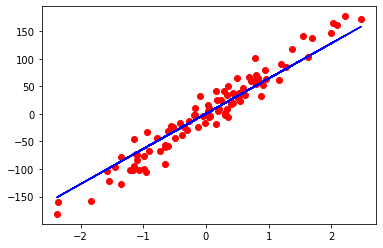

In [ ]:
# Linear Regression

# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32)).view(-1, 1)

n_samples, n_features = X.shape

# 1) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 3) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

#**Logistic Regression**

In [ ]:
# 0) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(-1, 1)
y_test = y_test.view(-1, 1)

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

epoch: 10, loss = 0.5837
epoch: 20, loss = 0.4820
epoch: 30, loss = 0.4177
epoch: 40, loss = 0.3732
epoch: 50, loss = 0.3403
epoch: 60, loss = 0.3148
epoch: 70, loss = 0.2942
epoch: 80, loss = 0.2772
epoch: 90, loss = 0.2628
epoch: 100, loss = 0.2504
accuracy: 0.8947


# **Data**

## **Custom**

### **Dataset**

In [3]:
# Implement a custom Dataset:
# inherit Dataset
# implement __init__ , __getitem__ , and __len__

class WineDataset(Dataset):
  
    def __init__(self, transform=None):
        xy = np.loadtxt('/content/drive/MyDrive/data/wine.csv', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # note that we do not convert to tensor here
        self.x_data = xy[:, 1:]
        self.y_data = xy[:, [0]]

        self.transform = transform

    def __getitem__(self, index):
        sample = self.x_data[index], self.y_data[index]

        if self.transform:
            sample = self.transform(sample)

        return sample

    def __len__(self):
        return self.n_samples

# create dataset
dataset = WineDataset()

### **Data loader**

In [4]:
# get first sample and unpack
first_data = dataset[0]
features, labels = first_data
print(features, labels)

[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]


### **Data transformer**

In [15]:
# Custom Transforms
# implement __call__(self, sample)
class ToTensor:
    # Convert ndarrays to Tensors
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform:
    # multiply inputs with a given factor
    def __init__(self, factor):
        self.factor = factor

    def __call__(self, sample):
        inputs, targets = sample
        inputs *= self.factor
        return inputs, targets

In [16]:
print('Without Transform')
dataset = WineDataset()
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor Transform')
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

print('\nWith Tensor and Multiplication Transform')
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(4)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features), type(labels))
print(features, labels)

Without Transform
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
 2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03] [1.]

With Tensor Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03]) tensor([1.])

With Tensor and Multiplication Transform
<class 'torch.Tensor'> <class 'torch.Tensor'>
tensor([5.6920e+01, 6.8400e+00, 9.7200e+00, 6.2400e+01, 5.0800e+02, 1.1200e+01,
        1.2240e+01, 1.1200e+00, 9.1600e+00, 2.2560e+01, 4.1600e+00, 1.5680e+01,
        4.2600e+03]) tensor([1.])


## **Pytorch**

In [18]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset,
                          batch_size=3,
                          shuffle=True)


# look at one random sample
dataiter = iter(train_loader)
data = dataiter.next()
inputs, targets = data
print(inputs.shape, targets.shape)

torch.Size([3, 1, 28, 28]) torch.Size([3])


# **Softmax - Cross Entropy**

In [93]:
# synthetic data
y_true = torch.tensor([1, 0, 0])

y_pred1 = torch.tensor([8, 4, 4], dtype=torch.float32)
y_pred2 = torch.tensor([-5, 7, 9], dtype=torch.float32)

In [94]:
def my_softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

print('my softmax:', my_softmax(y_pred1.numpy()))

print('torch softmax:', torch.softmax(y_pred1, dim=0))

my softmax: [0.96466315 0.01766842 0.01766842]
torch softmax: tensor([0.9647, 0.0177, 0.0177])


In [95]:
def my_cross_entropy(true, pred):
  loss = - sum(true * np.log(pred))
  return loss #/ pred.shape[0] as it seems torch crossentropy doesn use normalization

print(f'my cross entropy loss 1: {my_cross_entropy(y_true.numpy(), my_softmax(y_pred1.numpy())):.4f}')
print(f'my cross entropy loss 2: {my_cross_entropy(y_true.numpy(), my_softmax(y_pred2.numpy())):.4f}')

# torch crossentropy applys softmax itself so we dont need to write it here
# size of parameteres should be nsamples x nclasses thats why we are using .view
# and also y_true should not be one hot encoded it need just lableb thats why we use tensor([0])
loss = nn.CrossEntropyLoss()
print(f'torch cross entropy loss 1: {loss(y_pred1.view(1,-1), torch.tensor([0])):.4f}')
print(f'torch cross entropy loss 2: {loss(y_pred2.view(1,-1), torch.tensor([0])):.4f}')

my cross entropy loss 1: 0.0360
my cross entropy loss 2: 14.1269
torch cross entropy loss 1: 0.0360
torch cross entropy loss 2: 14.1269
